In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib as mpl 
mpl.rcParams.update({'font.size': 18, 
                     'xtick.color': "white",
                     'ytick.color': "white",
                     'axes.labelcolor': "white",
                     'legend.columnspacing':0.5,
                     'lines.linewidth':4,
                     'legend.handlelength':1,
                     'legend.fontsize':14})


In [3]:
def getMaxCellsPerSecond(filename):
    df = pd.read_csv(filename,delim_whitespace=True)


    df["cells" ] = (df["ie_"] + 1 - df["is_"])*(df["je_"] + 1 - df["js_"])*(df["ke_"] + 1 - df["ks_"])
    df["flops_per_cell_"] = 15
    df["FLOPS"] = df["nsteps_"]*df["flops_per_cell_"]*df["cells"]/df["elapsed_times_[0]"]
    df["GFLOPS"] = df["FLOPS"]/1e9
    df["cells_per_second"] = df["nsteps_"]*df["cells"]/df["elapsed_times_[0]"]

    df["cells_per_second"].max()/1e9
    idx = df["cells_per_second"].idxmax()
    return df.loc[idx]

In [4]:
getMaxCellsPerSecond("../data/CUDA_pfe.dat")

T                          float
ni_                          256
nj_                          256
nk_                          256
size_                   16777216
is_                            0
ie_                          255
js_                            0
je_                          255
ks_                            0
ke_                          255
nvars_                         5
mem_size_              335544320
mem_type_                kMalloc
pre_step_type_             kNone
step_type_                kNaive
post_step_type_            kNone
ncells_                 16777216
flops_per_cell_               15
arith_intensity_         0.46875
nsteps_                        5
ndims_                         1
elapsed_times_[0]      0.0232259
cells                   16777216
FLOPS                5.41762e+10
GFLOPS                   54.1762
cells_per_second     3.61175e+09
Name: 72, dtype: object

In [5]:
getMaxCellsPerSecond("../data/kokkosCUDA_pfe.dat")

T                                       float
Layout                    Kokkos::LayoutRight
IType                                    long
ItOuter              Kokkos::Iterate::Default
ItInner              Kokkos::Iterate::Default
ni_                                       512
nj_                                       128
nk_                                       128
size_                                 8388608
is_                                         0
ie_                                       511
js_                                         0
je_                                       127
ks_                                         0
ke_                                       127
tiling_[0]                                  0
tiling_[1]                                  0
tiling_[2]                                  0
vector_length_                              1
nvars_                                      5
pre_step_type_                          kNone
step_type_                        

In [6]:
getMaxCellsPerSecond("../data/kokkosCPU_hpcc.dat")

T                                       float
Layout                    Kokkos::LayoutRight
IType                                    long
ItOuter              Kokkos::Iterate::Default
ItInner              Kokkos::Iterate::Default
ni_                                       256
nj_                                       256
nk_                                       256
size_                                16777216
is_                                         0
ie_                                       255
js_                                         0
je_                                       255
ks_                                         0
ke_                                       255
tiling_[0]                                  0
tiling_[1]                                  0
tiling_[2]                                  0
vector_length_                             64
nvars_                                      5
pre_step_type_                          kNone
step_type_                        

In [7]:
def plotCellsPerSecond(filename):
    df = pd.read_csv(filename,delim_whitespace=True)


    df["cells" ] = (df["ie_"] + 1 - df["is_"])*(df["je_"] + 1 - df["js_"])*(df["ke_"] + 1 - df["ks_"])
    df["flops_per_cell_"] = 15
    df["FLOPS"] = df["nsteps_"]*df["flops_per_cell_"]*df["cells"]/df["elapsed_times_[0]"]
    df["GFLOPS"] = df["FLOPS"]/1e9
    df["cells_per_second"] = df["nsteps_"]*df["cells"]/df["elapsed_times_[0]"]


    #df = df.sort_values(by=["max_block_size_"])
    plt.bar(np.arange(df.shape[0]),df["cells_per_second"])
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    plt.ylabel("Cells/Second")
def plotCellsPerSecond_SortByLayout(filename):
    df = pd.read_csv(filename,delim_whitespace=True)


    df["cells" ] = (df["ie_"] + 1 - df["is_"])*(df["je_"] + 1 - df["js_"])*(df["ke_"] + 1 - df["ks_"])
    df["flops_per_cell_"] = 15
    df["FLOPS"] = df["nsteps_"]*df["flops_per_cell_"]*df["cells"]/df["elapsed_times_[0]"]
    df["GFLOPS"] = df["FLOPS"]/1e9
    df["cells_per_second"] = df["nsteps_"]*df["cells"]/df["elapsed_times_[0]"]


    df = df.sort_values(by=["Layout","step_type_"])
    plt.bar(np.arange(df.shape[0]),df["cells_per_second"])
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    plt.ylabel("Cells/Second")

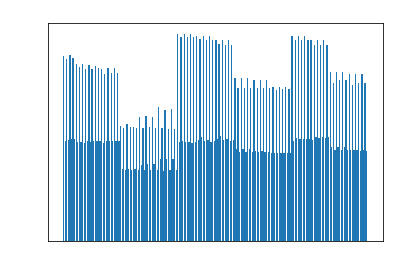

In [8]:
plotCellsPerSecond("../data/CUDA_pfe.dat")

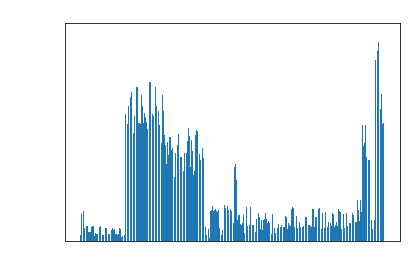

In [9]:
plotCellsPerSecond_SortByLayout("../data/kokkosCPU_hpcc.dat")

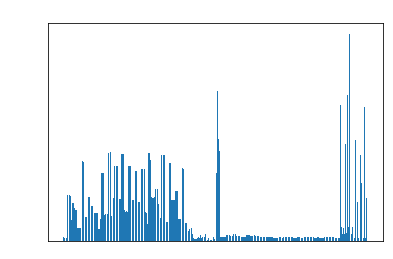

In [10]:
plotCellsPerSecond_SortByLayout("../data/kokkosCUDA_pfe.dat")

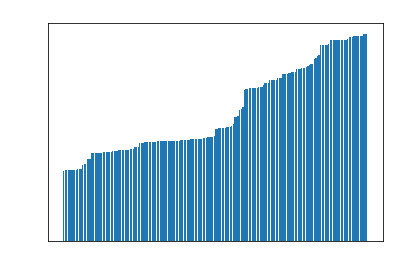

In [11]:
filename="../data/CUDA_pfe.dat"
df = pd.read_csv(filename,delim_whitespace=True)

df["cells" ] = (df["ie_"] + 1 - df["is_"])*(df["je_"] + 1 - df["js_"])*(df["ke_"] + 1 - df["ks_"])
df["flops_per_cell_"] = 15
df["FLOPS"] = df["nsteps_"]*df["flops_per_cell_"]*df["cells"]/df["elapsed_times_[0]"]
df["GFLOPS"] = df["FLOPS"]/1e9
df["cells_per_second"] = df["nsteps_"]*df["cells"]/df["elapsed_times_[0]"]


df = df.sort_values(by=["cells_per_second"])
plt.bar(np.arange(df.shape[0]),df["cells_per_second"])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.ylabel("Cells/Second")
plt.show()

In [14]:
df

,T,ni_,nj_,nk_,size_,is_,ie_,js_,je_,ks_,...,ncells_,flops_per_cell_,arith_intensity_,nsteps_,ndims_,elapsed_times_[0],cells,FLOPS,GFLOPS,cells_per_second
63,double,64,64,64,262144,2,61,2,61,2,...,216000,15,0.234375,5,1,0.000883,216000,1.834771e+10,18.347709,1.223181e+09
43,double,64,64,64,262144,2,61,2,61,2,...,216000,15,0.234375,5,1,0.000879,216000,1.842048e+10,18.420478,1.228032e+09
71,double,64,64,64,262144,2,61,2,61,2,...,216000,15,0.234375,5,1,0.000877,216000,1.847425e+10,18.474255,1.231617e+09
67,double,64,64,64,262144,2,61,2,61,2,...,216000,15,0.234375,5,1,0.000876,216000,1.848302e+10,18.483023,1.232202e+09
51,double,64,64,64,262144,2,61,2,61,2,...,216000,15,0.234375,5,1,0.000874,216000,1.852631e+10,18.526312,1.235087e+09
55,double,64,64,64,262144,2,61,2,61,2,...,216000,15,0.234375,5,1,0.000873,216000,1.855959e+10,18.559592,1.237306e+09
39,double,64,64,64,262144,2,61,2,61,2,...,216000,15,0.234375,5,1,0.000873,216000,1.856231e+10,18.562314,1.237488e+09
47,double,64,64,64,262144,2,61,2,61,2,...,216000,15,0.234375,5,1,0.000873,216000,1.856300e+10,18.562995,1.237533e+09
59,double,64,64,64,262144,2,61,2,61,2,...,216000,15,0.234375,5,1,0.000871,216000,1.859709e+10,18.597091,1.239806e+09
37,double,64,64,64,262144,2,61,2,61,2,...,216000,15,0.234375,5,1,0.000866,216000,1.871257e+10,18.712575,1.247505e+09
